## Uber Data Analysis- Manhattan
### *We will explore the Uber Cars Data for April 2014 for Manhattan. Manhattan is also famous for it's traffic congestion and the Uber teams have to optimize the Ride Journey for their customers in NYC continually*


### The Product Platform, Rides, and Maps team within the Product Development team at Uber are focused on making Uber's core ridesharing products faster, safer, and more reliable.
 * Data underpins their products, enabling intelligent decision making and improved user experiences. They are leveraging the latest ML, Big Data, data visualization, and NLP technologies; the Product Platform team works at the intersection of engineering and data science to enhance their services and deliver actionable insights.









### Problem- 
### It is May 2014, and the demand during the first quarter was tremendous. But a huge problem which the customers were facing was that there comparatively lower ride frequency and the Estimated Time of Arrival was high. In a city like Manhattan, where time is money, this may be a prominent factor for customers to divert to another competitor like Lyft.

1.The Product Development teams want to view the frequency of rides drilled down to different Levels of Detail like Day and Hour of the Day. From these graphs, they can increase the frequency of rides during certain hours. 

2.Also, we have the Latitude and Longitude information used to Map the frequency of rides on the Map. The Strategy team wants to view the rides on a Map to enhance their decisions for the highly clustered areas.















### We have a raw dataset of Uber Rides that contains the Date and Time of the Ride Taken, Latitude and Longitude to denote the Pick Up location of the customer.

In [113]:
import pandas as pd 
import numpy as np
%matplotlib inline
%pylab inline
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [114]:
pwd

'C:\\Users\\Harsh\\Hard Disk Files'

In [115]:
df = pd.read_csv("uberdata.csv")

In [116]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### With .info() function we can see view the number of rows. This table has approximately 560K values.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


### Converting to Date Time format and Adding some new columns.

In [150]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)  #Using .map() function

In [119]:
t = df['Date/Time']

In [151]:
df['Date of Month'] = df['Date/Time'].apply(lambda t: t.day) #Using .apply() and Lambda function|

In [121]:
df

,Date/Time,Lat,Lon,Base,Date of Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30


In [125]:
df[df['Date of Month'] == 4].head()

,Date/Time,Lat,Lon,Base,Date of Month,Year
3829,2014-04-04 00:03:00,40.7528,-73.9858,B02512,4,2014
3830,2014-04-04 00:05:00,40.7263,-74.0018,B02512,4,2014
3831,2014-04-04 00:12:00,40.7263,-73.9917,B02512,4,2014
3832,2014-04-04 00:12:00,40.7813,-73.9516,B02512,4,2014
3833,2014-04-04 00:14:00,40.7170,-73.9987,B02512,4,2014


In [126]:
#Creating a function to return year
def get_year(dt):            
    return dt.year
df['Year'] = df['Date/Time'].map(get_year)

### We have separated the Date of the Month, Year and Weed Day from the Date/Time Column because we want to use it to visualize the frequency per Day.

In [127]:
df.head()

,Date/Time,Lat,Lon,Base,Date of Month,Year
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,2014
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,2014
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,2014
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,2014
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,2014


### Analyzing the frequency of rides per day for the month of April, 2014.

Text(0.5, 1.0, 'Uber - Per Day Frequency')

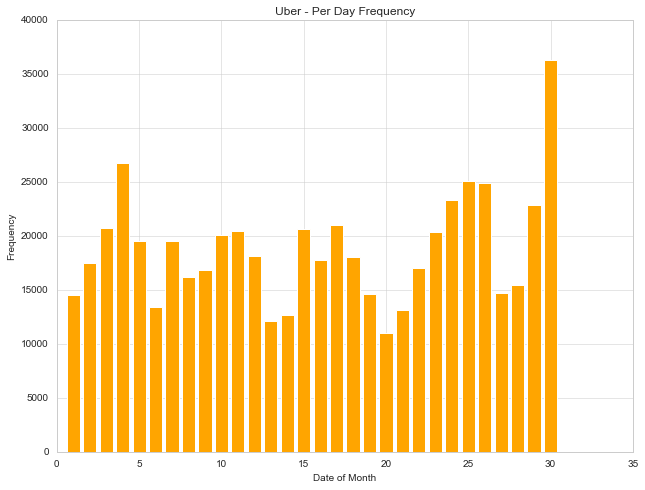

In [129]:
fig=plt.figure(figsize=(8,6))
his=fig.add_axes([0,0,1,1])
plt.hist(df['Date of Month'],bins= 30, rwidth = 0.8, range= (0.5,30.5),color= 'orange')
sns.set_style('whitegrid')
plt.xlabel('Date of Month')
plt.ylabel('Frequency')
plt.title('Uber - Per Day Frequency')

### Insights - We can see that the maximum frequency of Uber Cars is on the last day(approx. 36K rides) and we can observe that there is a slight trend which conveys that there is a bit higher frequency during mid-week. We will visualize it in more detail futher by using aggregation by days of the week.

### Getting the Frequency by Day of the Month and sorting them in ascending order.

In [130]:
date_data = df.groupby('Date of Month').size()
date_data

Date of Month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [131]:
s = date_data.sort_values()
s

Date of Month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

### Analyzing the the Frequency of rides in Descending Order of Frequency

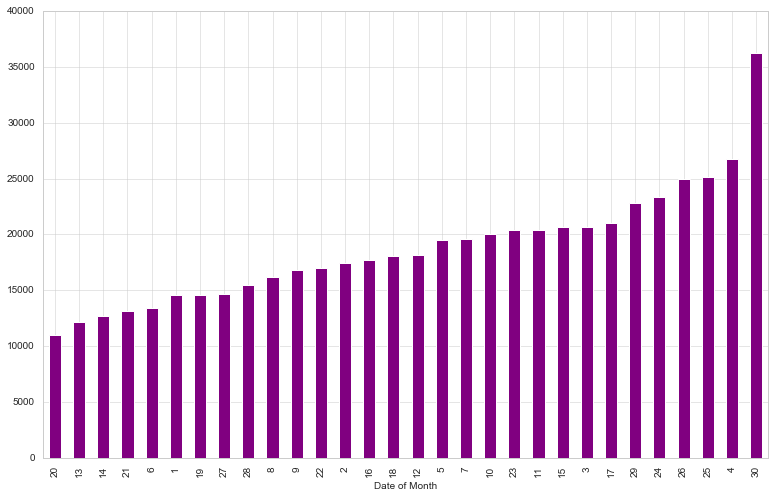

<Figure size 432x288 with 0 Axes>

In [132]:
s.plot.bar(color='purple', figsize=(13, 8))
plt.show()
plt.tight_layout()
sns.set_style('whitegrid')


### Insights- We can notice that the last day of the month had the highest frequency(approx 36K rides), followed by the 4th(approx. 26K rides), 25th and so on...

### Separating the Hour value from the Date/Time column

In [133]:
df['Hour'] = df['Date/Time'].apply(lambda t: t.hour)

In [134]:
df

,Date/Time,Lat,Lon,Base,Date of Month,Year,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,2014,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,2014,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,2014,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,2014,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,2014,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2014,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2014,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2014,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2014,23


### Plotting the Distribution of Frequency by Hour of the day. 

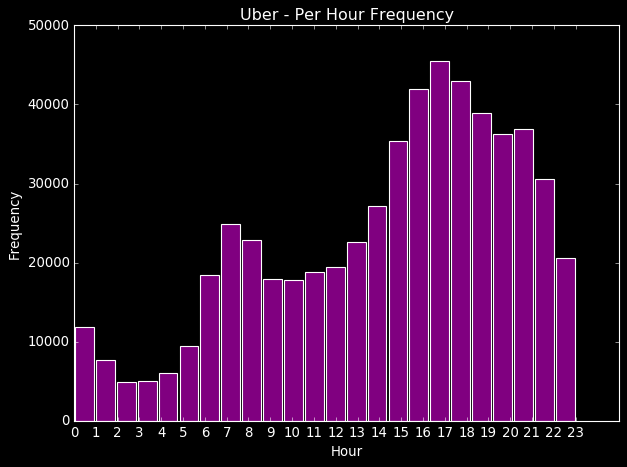

In [136]:
#Using an Historgram 
plt.hist(df['Hour'],bins=24,rwidth = 0.9,color= 'purple')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Uber - Per Hour Frequency')
plt.xticks(range(24))
plt.tight_layout()
plt.style.use('classic')
plt.style.use('dark_background')

### Insights - The graph is Left- Skewed. This means that the frequency is higher during the evening hours. 
### We can observe that the frequency of the Uber Cars increases rapidly around 3pm before the evening, it touches the peak around 4pm - 5pm.
### The demand is high untill 9pm -10pm and falls gradually till mid-nights. We can predict that there is a great demand during the early and late evenings(4pm - 10pm)when people are travelling from their offices or visiting NYC during night time. 


### Plotting the Frequency by each Day of a week. Aggregated the frequency by Grouping it by Day of the week.

In [143]:
#getting the weekday by defining a function and then mapping it to the data.
def get_weekday(dt):
    return dt.weekday()

df['Week Day'] = df['Date/Time'].map(get_weekday)


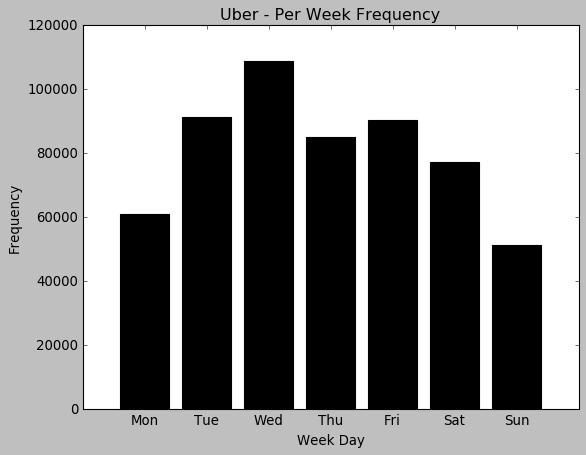

In [144]:
plt.hist(df['Week Day'],bins=7 ,rwidth=0.8,range = (-0.5,6.5))
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Week Day')
plt.ylabel('Frequency')
plt.title('Uber - Per Week Frequency')
plt.style.use('grayscale')

### We can observe that the frequency of Uber Rides is more during the weekdays and highest during the mid-week period on Tuesday and Wednesday.

### The frequency high on Friday too considering it is a weekend and a party/celebration time for visitors in Manhattan.
### Also the frequency is Low during weekends, that might be because the offices are closed.

### We want to create a Heat Map to visualize the Days and Hours with High and Low Frequencies together.

In [146]:
cross = df.groupby(['Hour','Week Day']).size()
cross

Hour  Week Day
0     0            518
      1            765
      2            899
      3            792
      4           1367
                  ... 
23    2           2571
      3           2909
      4           5393
      5           5719
      6           1018
Length: 168, dtype: int64

In [147]:
#Unstacking the cross to create a Cross Table
by_cross = cross.unstack(level=0)
by_cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week Day,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


### Plotting a Heat Map to visualize Days and Hours with Low and High Frequency.

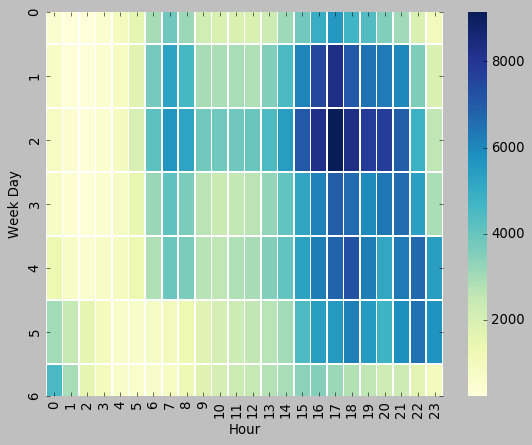

In [149]:
#Using a sns.heatmap to visualize frequencies
sns.heatmap(by_cross,linewidths=.5,cmap="YlGnBu")


### We can observe that the frequency is highest during the evening time and during the mid-week period.
### The frequency is highest on the 3rd Day of the Week and 17th Hour.
### Also the patch during the 7th and the 1st day of the week tells us that very few people have used Uber during the weekends in the month of April.
### We can conclude that the frequency is high during the mid-week days and during the evenings.

### Plot of Latitude and Longitutde showing places with High frequency of rides.

''

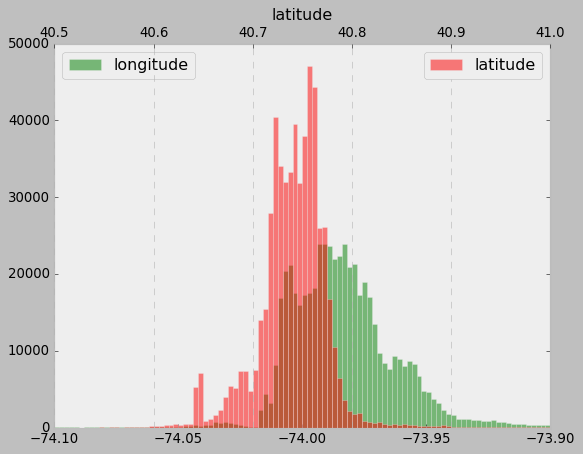

In [372]:
hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(df['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
plt.style.use('bmh')

plt.xlabel('latitude')
plt.ylabel('longitude')
;

### We have plot a graph of the Latitude and Longitude points. 
### If you carefully observe, it represents a cool MAP of Manhattan,New York.
### Now we can see that the frequency is dense near the Central Park area and Downtown area.

(40.7, 41)

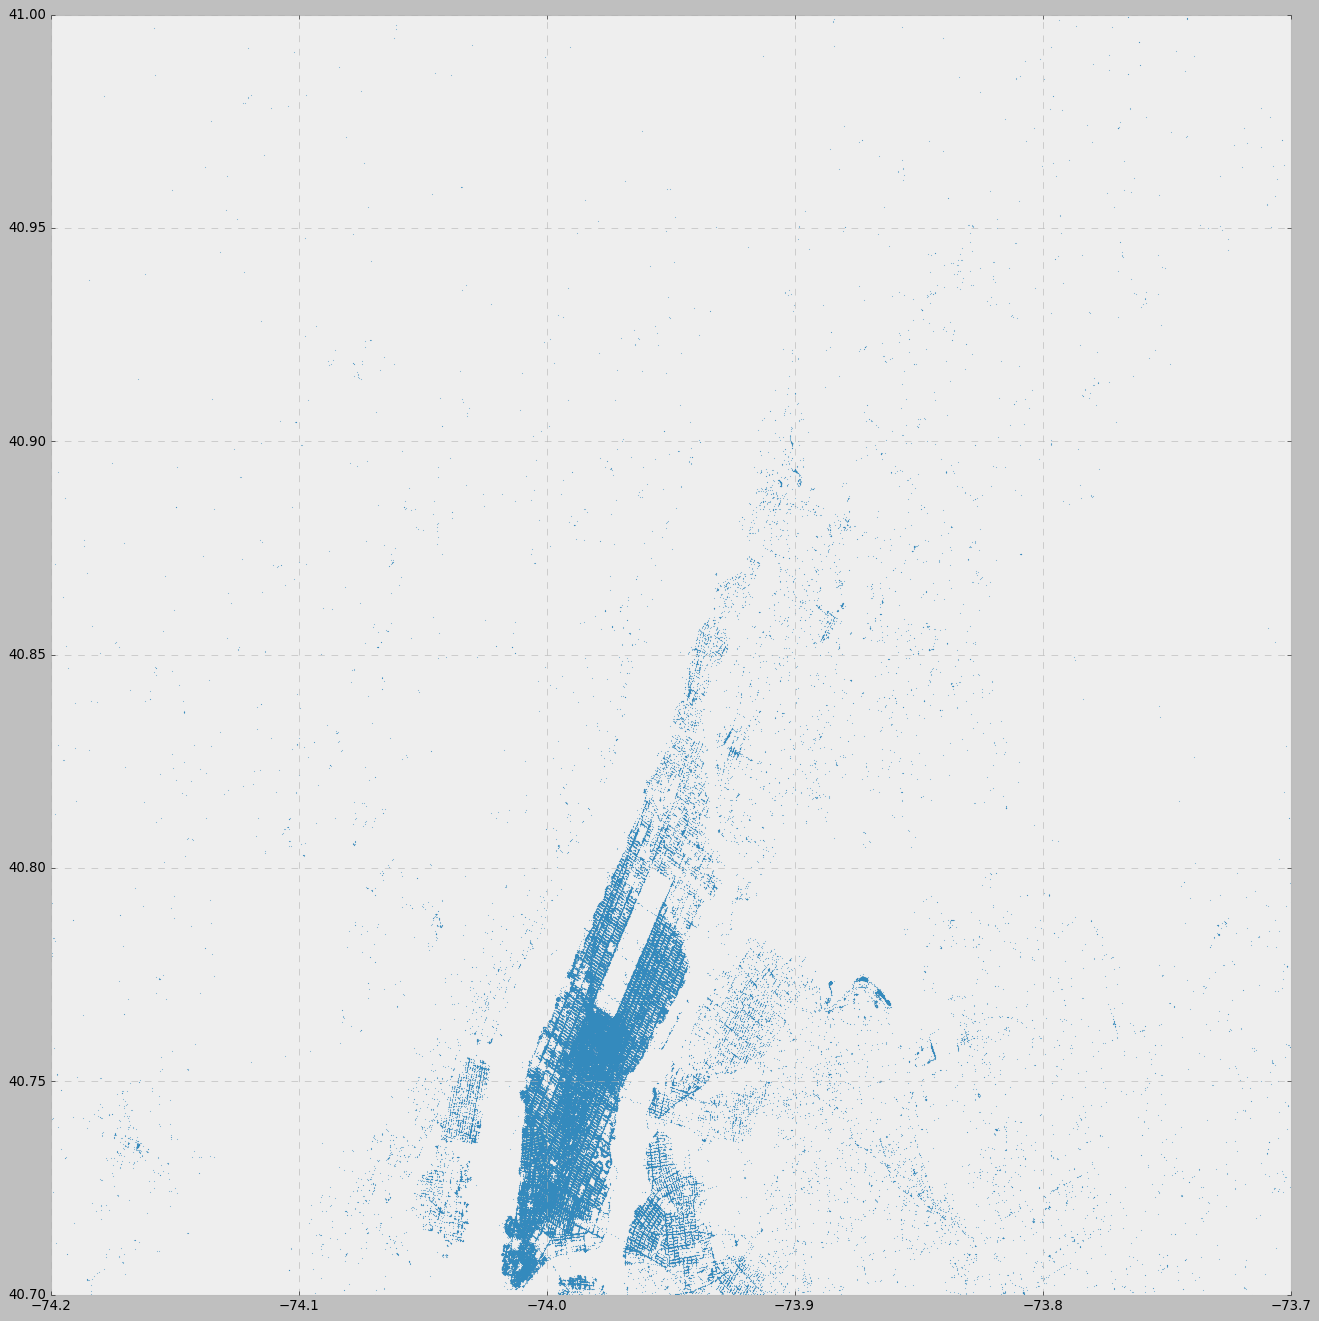

In [373]:
#Plotting Longitute and Latitude on X-axis and Y-axis to view a Map of Manhattan.
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)

### Working with a real world data is always fun.